<a href="https://colab.research.google.com/github/jlcalleu18/MicroCredential-DataAnalytics/blob/main/Day_11_Personal_Copy_of_GroupProject_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Splitting 70-30

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import plotly

from sklearn.model_selection import train_test_split

In [ ]:
ad=pd.read_csv('https://raw.githubusercontent.com/glopez21/ML-Data/main/advertising.csv')

Tell me - how successful are these ads?

In [ ]:
# Shape of the dataset
ad.shape

(1000, 10)

In [ ]:
# Examination of what the columns are divided by.
ad.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad'],
      dtype='object')

In [ ]:
ad.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [ ]:
ad.isnull().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Male                        0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

In [ ]:
ad['Clicked on Ad'].value_counts()

1    500
0    500
Name: Clicked on Ad, dtype: int64

In [ ]:
# Unnecessary column
ad['City'].value_counts()

Lisamouth          3
Williamsport       3
New Jessicaport    2
Lake David         2
Millertown         2
                  ..
Lake Kurtmouth     1
Palmerside         1
Sanchezmouth       1
Andersonchester    1
West Richard       1
Name: City, Length: 969, dtype: int64

In [ ]:
ad.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad'],
      dtype='object')

In [ ]:
#focus on binary classification model with  logistic regression since we want to predict whether or not someone is likely to click on an ad (binary classif. (0=false))
# decided to drop Ad Topic Line, City, Country, Timestamp
ad.drop(columns=['Ad Topic Line', 'City','Country','Timestamp'], inplace=True) 
ad.head()


,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
0,68.95,35,61833.90,256.09,0,0
1,80.23,31,68441.85,193.77,1,0
2,69.47,26,59785.94,236.50,0,0
3,74.15,29,54806.18,245.89,1,0
4,68.37,35,73889.99,225.58,0,0


In [ ]:
ad.dtypes

Daily Time Spent on Site    float64
Age                           int64
Area Income                 float64
Daily Internet Usage        float64
Male                          int64
Clicked on Ad                 int64
dtype: object

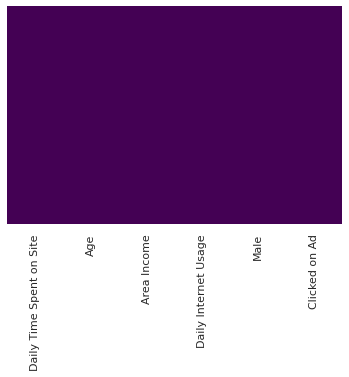

In [ ]:
#to reflect an absence of null values in updated dataFrame 'ad'
sns.heatmap(ad.isnull(), yticklabels=False,cbar=False,cmap='viridis')

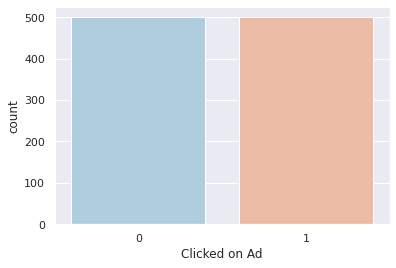

In [ ]:
# showing the count of those that clicked on an ad(1) and those that did not click on an ad(0)
sns.countplot(x='Clicked on Ad', data=ad, palette='RdBu_r')
    # confirms : ad['Clicked on Ad'].value_counts()



##Splitting the Data

In [ ]:
#splitting dataFrame 'ad' into test and train subsets
X_train, X_test, y_train, y_test = train_test_split(ad.drop('Clicked on Ad',axis=1), 
                                                    ad['Clicked on Ad'], test_size=0.30, random_state=101
                                                  )

In [ ]:
#displays shape of each subset
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(700, 5) (300, 5) (700,) (300,)


#Creating and Training the Logistic Regression Model

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
# Loading the logistic regression model
logmodel=LogisticRegression()

In [ ]:
# Training the logistic regression model
logmodel.fit(X_train, y_train)

LogisticRegression()

#Testing the Model

In [ ]:
# Stores the predicted y_test values
predictions = logmodel.predict(X_test)

#Classification Report

In [ ]:
from sklearn.metrics import classification_report
# Prints measures of accuracy of the model for binary classification of 'Clicked on Ad'
print(classification_report(y_test,predictions)) #assesses actual y_test values against predict (aka Y_test_predict)


              precision    recall  f1-score   support

           0       0.91      0.95      0.93       157
           1       0.94      0.90      0.92       143

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300



####Precision  of 91% in identifying if a person would not click on an ad.
####Precision of 94% in identifying if a person would  click on an ad.
####Recall is the ratio of True Positive and the sum of True Positive and False Negative.
####F1-Score is a score of the performance of the model, the combined result of Precision and Recall.
####Support is the number of data samples used in the report.

#Confusion Matrix

In [ ]:
# Importing the confusion matrix tool
from sklearn.metrics import confusion_matrix

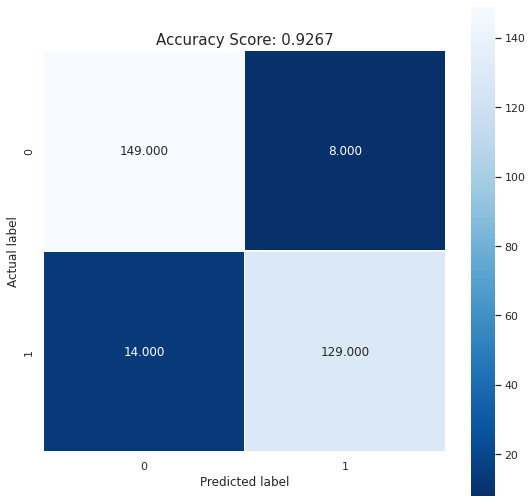

In [ ]:
plt.figure(figsize=(9,9))
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
# Creates a confusion matrix after comparing the actual y_test values against the predict values (aka Y_test_predict)
# The rest is formating for visualization purposes.
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(round(logmodel.score(X_test, y_test),4))
plt.title(all_sample_title, size = 15);

#### TN= 149 instances where the predicted y_test_values did  match the actual y_test values (both were 0(did not click an ad))
#### TP=129 instances where the predicted y_test_values did  match the actual y_test values (both were 1(did click an ad))
#### FN= 14 instances where the predicted y_test_values did not  match the actual y_test values (actual value was 1(did click an ad) while model predicted 0(did not click an ad))
#### FP=8 instances where the predicted y_test_values did not  match the actual y_test values (actual value was 0(did not click on an ad) while model predicted 1(did click on an ad))

In [ ]:
from sklearn import  metrics

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.



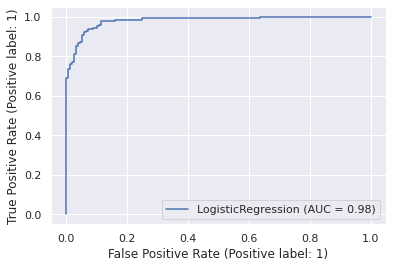

In [ ]:
metrics.plot_roc_curve(logmodel, X_test, y_test)  

#Evaluating the Model

In [ ]:
# Prints the mean accuracy on the given test data and levels (approximately 92.66%)
print("Accuracy of", round((logmodel.score(X_test,y_test)*100),2),"%")

# Assigns the predicted y test values after using the X_test values
y_test_predict = logmodel.predict(X_test)

print("In this scenario:")
print(sum(y_test_predict!=0), "people clicked on an ad.")
print(sum(y_test_predict==0), "people did not click on an ad.")

Accuracy of 92.67 %
In this scenario:
137 people clicked on an ad.
163 people did not click on an ad.


# Splitting 90-10

In [ ]:
# Run the same analysis with a new split.
X_train, X_test, y_train, y_test = train_test_split(ad.drop('Clicked on Ad',axis=1), 
                                                    ad['Clicked on Ad'], test_size=0.10, random_state=101
                                                  )

In [ ]:
#displays shape of each subset
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(900, 5) (100, 5) (900,) (100,)


###Creating and Training the Logistic Regression Model

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
# Loading the logistic regression model
logmodel=LogisticRegression()

In [ ]:
# Training the logistic regression model
logmodel.fit(X_train, y_train)

LogisticRegression()

### Testing the Model

In [ ]:
# Stores the predicted y_test values
predictions = logmodel.predict(X_test)

#Classification Report

In [ ]:
from sklearn.metrics import classification_report
# Prints measures of accuracy of the model for binary classification of 'Clicked on Ad'
print(classification_report(y_test,predictions)) #assesses actual y_test values against predict (aka Y_test_predict)


              precision    recall  f1-score   support

           0       0.85      0.96      0.90        47
           1       0.96      0.85      0.90        53

    accuracy                           0.90       100
   macro avg       0.90      0.90      0.90       100
weighted avg       0.91      0.90      0.90       100



####Precision  of 85% in identifying if a person would not click on an ad.
####Precision of 96% in identifying if a person would  click on an ad.
####Recall is the ratio of True Positive and the sum of True Positive and False Negative.
####F1-Score is a score of the performance of the model, the combined result of Precision and Recall.
####Support is the number of data samples used in the report.

#Confusion Matrix

In [ ]:
# Importing the confusion matrix tool
from sklearn.metrics import confusion_matrix

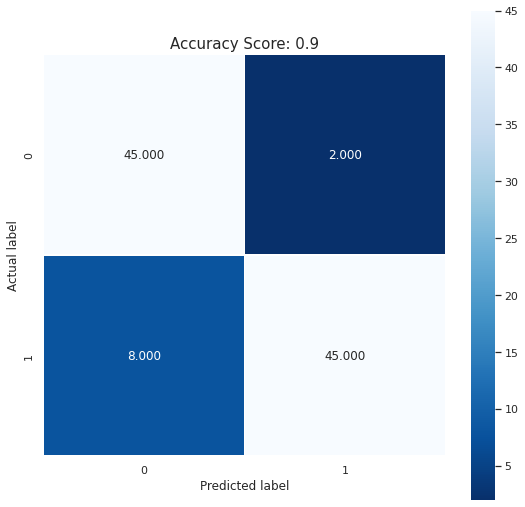

In [ ]:
plt.figure(figsize=(9,9))
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
# Creates a confusion matrix after comparing the actual y_test values against the predict values (aka Y_test_predict)
# The rest is formating for visualization purposes.
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(round(logmodel.score(X_test, y_test),4))
plt.title(all_sample_title, size = 15);

#### TN= 45 instances where the predicted y_test_values did  match the actual y_test values (both were 0(did not click an ad))
#### TP=45 instances where the predicted y_test_values did  match the actual y_test values (both were 1(did click an ad))
#### FN= 8 instances where the predicted y_test_values did not  match the actual y_test values (actual value was 1(did click an ad) while model predicted 0(did not click an ad))
#### FP=2 instances where the predicted y_test_values did not  match the actual y_test values (actual value was 0(did not click on an ad) while model predicted 1(did click on an ad))

In [ ]:
from sklearn import  metrics

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.



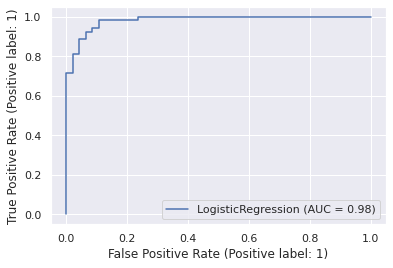

In [ ]:
metrics.plot_roc_curve(logmodel, X_test, y_test) 
#ROC Curve Creation
#ROC curve is a plot that displays the sensitivity and specificity of a logistic regression model 

The closer AUC(Area Under Curve) is to 1, the better the model.

This one goes hard.

A model with an AUC equal to 0.5 would be a perfectly diagonal line and it would represent a model that is no better than a model that makes random classifications.

#Evaluating the Model

In [ ]:
# Prints the mean accuracy on the given test data and levels (approximately 92.66%)
print("Accuracy of", round((logmodel.score(X_test,y_test)*100),2),"%")

# Assigns the predicted y test values after using the X_test values
y_test_predict = logmodel.predict(X_test)

print("In this scenario:")
print(sum(y_test_predict!=0), "people clicked on an ad.")
print(sum(y_test_predict==0), "people did not click on an ad.")

Accuracy of 90.0 %
In this scenario:
47 people clicked on an ad.
53 people did not click on an ad.


# Splitting 80-20

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(ad.drop('Clicked on Ad',axis=1), 
                                                    ad['Clicked on Ad'], test_size=0.20, random_state=101
                                                  )

#Creating and Training the Logistic Regression Model

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
# Loading the logistic regression model
logmodel=LogisticRegression()

In [ ]:
# Training the logistic regression model
logmodel.fit(X_train, y_train)

LogisticRegression()

#Testing the Model

In [ ]:
# Stores the predicted y_test values
predictions = logmodel.predict(X_test)

#Classification Report

In [ ]:
from sklearn.metrics import classification_report
# Prints measures of accuracy of the model for binary classification of 'Clicked on Ad'
print(classification_report(y_test,predictions)) #assesses actual y_test values against predict (aka Y_test_predict)


              precision    recall  f1-score   support

           0       0.90      0.94      0.92       105
           1       0.93      0.88      0.91        95

    accuracy                           0.92       200
   macro avg       0.92      0.91      0.91       200
weighted avg       0.92      0.92      0.91       200



####Precision  of 90% in identifying if a person would not click on an ad.
####Precision of 93% in identifying if a person would  click on an ad.
####Recall is the ratio of True Positive and the sum of True Positive and False Negative.
####F1-Score is a score of the performance of the model, the combined result of Precision and Recall.
####Support is the number of data samples used in the report.

#Confusion Matrix

In [ ]:
# Importing the confusion matrix tool
from sklearn.metrics import confusion_matrix

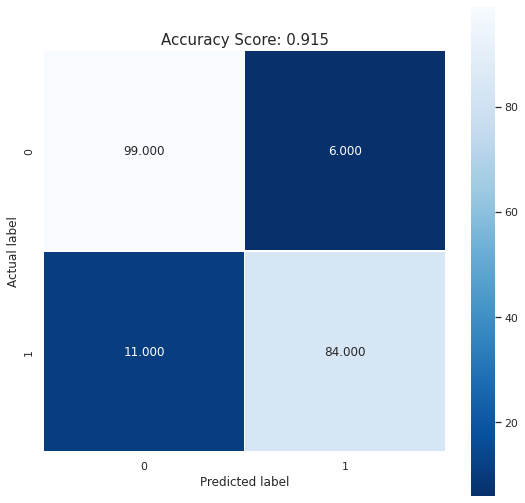

In [ ]:
plt.figure(figsize=(9,9))
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
# Creates a confusion matrix after comparing the actual y_test values against the predict values (aka Y_test_predict)
# The rest is formating for visualization purposes.
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(round(logmodel.score(X_test, y_test),4))
plt.title(all_sample_title, size = 15);

#### TN= 99 instances where the predicted y_test_values did  match the actual y_test values (both were 0(did not click an ad))
#### TP= 84 instances where the predicted y_test_values did  match the actual y_test values (both were 1(did click an ad))
#### FN= 11 instances where the predicted y_test_values did not  match the actual y_test values (actual value was 1(did click an ad) while model predicted 0(did not click an ad))
#### FP=6 instances where the predicted y_test_values did not  match the actual y_test values [Actual value was 0(Did not click on an ad) while model predicted 1(Did click on an ad)]

In [ ]:
from sklearn import  metrics

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.



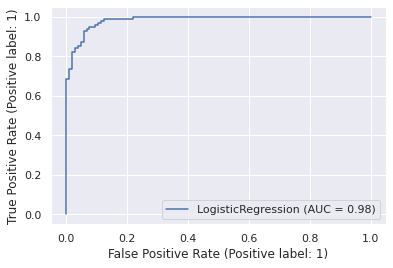

In [ ]:
metrics.plot_roc_curve(logmodel, X_test, y_test)  
#Creating an ROC Curve
#ROC curve is a plot that displays the sensitivity and specificity of a logistic regression model 

The closer AUC(Area Under Curve) is to 1, the better the model.

This one goes hard.

A model with an AUC equal to 0.5 would be a perfectly diagonal line and it would represent a model that is no better than a model that makes random classifications.

#Evaluating the Model

In [ ]:
# Prints the mean accuracy on the given test data and levels (approximately 92.66%)
print("Accuracy of", round((logmodel.score(X_test,y_test)*100),2),"%")

# Assigns the predicted y test values after using the X_test values
y_test_predict = logmodel.predict(X_test)

print("In this scenario:")
print(sum(y_test_predict!=0), "people clicked on an ad.")
print(sum(y_test_predict==0), "people did not click on an ad.")

Accuracy of 91.5 %
In this scenario:
90 people clicked on an ad.
110 people did not click on an ad.
